<a href="https://colab.research.google.com/github/Angegloria/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/Seminario/Gloria_Angelina_Estrada_Galindo_Seminario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:   <br> Gloria Angelina Estrada Galindo

Url: https://github.com/Angegloria/03MAIR---Algoritmos-de-Optimizacion---2019<br>

Problema:
> 1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones






                                        

1. Descripción del problema:

Problema 3 

Combinar cifras y operaciones

 • El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva.

 • Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)

 • Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada.

 Un ejemplo sería para obtener el 4: 4+2-6/3*1 = 4


(*) La respuesta es obligatoria


In [0]:
from itertools import permutations


operaciones = {'+':lambda a,b: a+b ,'-': lambda a,b: a-b,'*': lambda a,b: a*b, '/': lambda a,b: a/b}

In [0]:
cifra = [1, 4, 2, 3, 6]
operacion = ['+', '-', '*', '/']

def resolver(cifra,operacion):
    if len(operacion)==1:
        #print(cifra)
        #print(operacion)
        return operaciones[operacion[0]](cifra[0],cifra[1])
    if '*' in operacion:
        idx_mult = operacion.index('*')
        #print('idx_mult',idx_mult)
        cifra[idx_mult] = cifra[idx_mult]*cifra[idx_mult+1]
        del cifra[idx_mult+1]
        del operacion[idx_mult]
        #print(cifra)
        #print(operacion)
        return resolver(cifra,operacion)
    elif '/' in operacion:
        idx_div = operacion.index('/')
        #print('idx_div',idx_div)
        if cifra[idx_div+1] == 0:
            return False
        cifra[idx_div] = cifra[idx_div]/cifra[idx_div+1]
        del cifra[idx_div+1]
        del operacion[idx_div]
        #print(cifra)
        #print(operacion)
        return resolver(cifra,operacion)
    else:
        cifra[0] = operaciones[operacion[0]](cifra[0],cifra[1])
        del cifra[1]
        del operacion[0]
        #print(cifra)
        #print(operacion)
        return resolver(cifra,operacion)
    
resolver(cifra,operacion)

4.0

In [0]:
objetivo = 4
cifra = [0,0,0,0,0]
operacion = ['+','-','/','*']

def encontrar_ecuaciones(operacion,pos):
    
    cifra_ = list(cifra)
    operacion_ = list(operacion)
    if resolver(cifra_,operacion_) == objetivo:
        print('Resultado',cifra)
        print('Resultado',operacion)
        return True
    
    if 0 in cifra:
        idx = cifra.index(0)
    else:
        idx = pos
    
    
    for numero in range(1,10):
        
        if numero not in cifra:
            cifra[idx] = numero
            print(cifra)
            if pos == 4:
                pos = 0
            else:
                pos +=1
            if encontrar_ecuaciones(operacion,pos):
                return True
        
            cifra[idx] = 0
            print(cifra)
        
    return False

encontrar_ecuaciones(operacion,0)
        

[1, 0, 0, 0, 0]
[1, 2, 0, 0, 0]
[1, 2, 3, 0, 0]
[1, 2, 3, 4, 0]
[1, 2, 3, 4, 5]
[6, 2, 3, 4, 5]
[6, 1, 3, 4, 5]
[6, 1, 2, 4, 5]
[6, 1, 2, 3, 5]
[6, 1, 2, 3, 4]
[5, 1, 2, 3, 4]
[5, 6, 2, 3, 4]
[5, 6, 1, 3, 4]
[5, 6, 1, 2, 4]
[5, 6, 1, 2, 3]
[4, 6, 1, 2, 3]
[4, 5, 1, 2, 3]
[4, 5, 6, 2, 3]
[4, 5, 6, 1, 3]
[4, 5, 6, 1, 2]
[3, 5, 6, 1, 2]
[3, 4, 6, 1, 2]
Resultado [3, 4, 6, 1, 2]
Resultado ['+', '-', '/', '*']


True

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta

In [0]:
# Hay posibilidades infinitas al no tomar en cuenta las restricciones.

In [0]:
nr_posibilidades = len(list(permutations(range(1,10),5)))*len(list(permutations(['+','-','*','/'],4)))

print('Numero de posibilidades teniendo en cuenta todas las restricciones:')
print(f'{nr_posibilidades:.4e}')

Numero de posibilidades teniendo en cuenta todas las restricciones:
3.6288e+05


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta

In [0]:
# Utilizamos listas para almacenar los numeros y las operaciones.
# Utilizamos una funcion para resolver una ecuacion dada.
# Para buscar la solucion, se utiliza el algoritmo de vuelta atras, fijando las operaciones y cambiando los numeros.
# Como este es un problema de busqueda, se pueden usar diferentes algoritmos de arboles de decision.

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

In [0]:
# La funcion objetivo es buscar la ecuacion de la manera mas rapida y simple usando el algoritmo de vuelta atras, y que es 
# combinar todas las cifras alternativamente sin repetir ninguna de las cifras, para obtener una cantidad dada.
# Este se considera un problema de busqueda,(como ejemplo el problema de ordenacion de cantidades sin repetir 
# ninguna de ellas).
# Se dice que cuando una solucion corresponde directamente al objetivo del problema,se habla de maximizar como en este caso.


Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

In [0]:
# Utilizamos listas para almacenar los numeros y las operaciones.
# Utilizamos una funcion para resolver una ecuacion dada.
# Para buscar las posibles respuestas al problema, se hace una permutacion en las operaciones y otra permutacion 
# en los numeros. Despues tenemos dos for loops anidados para correr la funcion en cada combinacion e imprimir la respuesta,
# ademas de contar el numero de posibles soluciones.

def encontrar_ecuaciones_fuerza_bruta(objetivo, imprime=False):
    cifras = list(range(1,10))
    nr_ecuaciones_visitadas = 0
    hay_ecuacion = False
    for operacion in permutations(['+','-','*','/'],4):
        for cifra in permutations(cifras,5):
            operacion_ = list(operacion)
            cifra_ = list(cifra)
            result = resolver(cifra_,operacion_)
            nr_ecuaciones_visitadas += 1
            if result == objetivo:
                hay_ecuacion = True
                if imprime:
                    print(cifra[0],operacion[0],cifra[1],operacion[1],cifra[2],operacion[2],cifra[3],operacion[3],cifra[4])
                break
        if result == objetivo:
            break
    if hay_ecuacion == False:
        print('No hay ecuacion posible')
    if imprime:
        print('Numero de ecuaciones visitadas para encontrar el resultado = ',nr_ecuaciones_visitadas)
    return nr_ecuaciones_visitadas
    
            
encontrar_ecuaciones_fuerza_bruta(1.3,imprime=True)

2 - 1 + 6 / 4 * 5
Numero de ecuaciones visitadas para encontrar el resultado =  107617


107617

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

In [0]:
# El algoritmo de fuerza bruta no es muy complejo, porque solo hace dos loops anidados y comprueba el valor a cada paso.

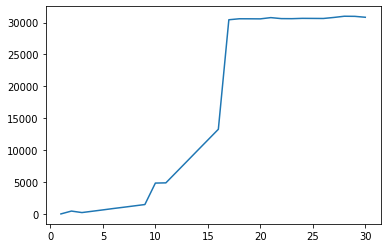

In [0]:
# Para obtener una idea de la complejidad, se crea una visualizacion de cuantas ecuaciones son visitadas para
# la busqueda de cada numero del 1 al 30.

import matplotlib.pyplot as plt

nr_ecuaciones_visitadas = []
for i in range(1,31):
    nr_ecuaciones_visitadas.append(encontrar_ecuaciones_fuerza_bruta(i,imprime=False))
    
plt.plot(range(1,31),nr_ecuaciones_visitadas)
plt.show()

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

In [0]:
# Utilizamos listas para almacenar los numeros y las operaciones.
# Utilizamos una funcion para resolver una ecuacion dada.
# Fijamos el primer numero de la ecuacion de acuerdo a ciertas condiciones:
#          Si objetivo == 1 --> fija 1
#         de lo contrario --> fija 9
# Tambien fijamos el segundo numero de acuerdo a ciertas condiciones:
#          Si objetivo == 1 --> fija 2
#         Si objetivo <9  --> fija 1
#         Si objetivo>9  --> fija 8
# Fijamos las operaciones
# Para buscar las posibles respuestas al problema, se hace una  permutacion 
# en los numeros restantes. Se cuenta el numero de ecuaciones visitadas hasta llegar a la respuesta.
# Este algoritmo esta dirigido para numeros enteros pero no para decimales.

def encontrar_ecuaciones_fuerza_bruta_mejor(objetivo, imprime=True):
    # lista con todas las cifras
    cifras = list(range(1,10))
    # inicializa el numero de ec. visitadas
    nr_ecuaciones_visitadas = 0
    
    # boolean para verificacion si el algoritmo encuentra una solucion (ecuacion) para el objetivo.
    hay_ecuacion = False
    
    # para mejorar la fuerza bruta, se remueven de las cifras los dos primeros numeros y se reduce el espacio de soluciones. (menos interaciones)
    if objetivo == 1:
        cifras.remove(1)
        cifras.remove(2)
    elif objetivo < 9:
        cifras.remove(9)
        cifras.remove(1)
    else:
        cifras.remove(9)
        cifras.remove(8)
    
    
    operacion = ['+','*','/','-']
    #for operacion in permutations(['/','-'],2):
    for cifra in permutations(cifras,3):
        
        operacion_ = list(operacion)
        
        cifra_ = list(cifra)
        
        # para mejorar la fuerza bruta, se fijan los dos primeros numeros y se reduce el espacio de soluciones 
        #(menos iteraciones)
        if objetivo == 1:
            cifra_.insert(0,2)
            cifra_.insert(0,1)
        elif objetivo < 9:
            cifra_.insert(0,9)
            cifra_.insert(0,1)
        else:
            cifra_.insert(0,9)
            cifra_.insert(1,8)

        result = resolver(cifra_,operacion_) # funcion para resolver la ecuacion dada
        nr_ecuaciones_visitadas += 1
        # comprueba que esta ecuacion es igual al objetivo
        if result == objetivo:
            hay_ecuacion = True

            cifra = list(cifra)
            if objetivo == 1:
                cifra.insert(0,2)
                cifra.insert(0,1)
            elif objetivo < 9:
                cifra.insert(0,9)
                cifra.insert(0,1)
            else:
                cifra.insert(0,9)
                cifra.insert(1,8)

            operacion = list(operacion)
            

            if imprime:
                print(cifra[0],operacion[0],cifra[1],operacion[1],cifra[2],operacion[2],cifra[3],operacion[3],cifra[4])
            break
        #if result == objetivo:
        #   break
    if hay_ecuacion == False:
        print('No hay ecuacion posible')
    if imprime:
        print('Numero de ecuaciones visitadas para encontrar el resultado = ',nr_ecuaciones_visitadas)
    return nr_ecuaciones_visitadas
    
            
encontrar_ecuaciones_fuerza_bruta_mejor(1)

1 + 2 * 6 / 3 - 4
Numero de ecuaciones visitadas para encontrar el resultado =  91


91

(*)Calcula la complejidad del algoritmo 

Respuesta

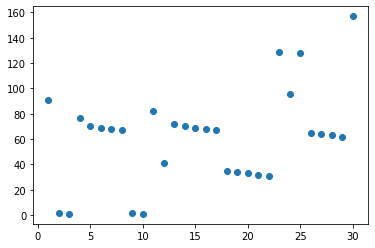

In [0]:
# Este algoritmo hace tambien una busqueda por las permutaciones posibles como en el de fuerza bruta, pero se ponen  
# restriciones adicionales para que se tenga un espacio de soluciones reducidas. Con esto se busca mucho mas rapido 
# porque se eliminan muchas ecuaciones que no nos llevan al resultado.

import matplotlib.pyplot as plt

nr_ecuaciones_visitadas = []
for i in range(1,31):
    nr_ecuaciones_visitadas.append(encontrar_ecuaciones_fuerza_bruta_mejor(i,imprime=False))
    
plt.plot(range(1,31),nr_ecuaciones_visitadas,'o')
plt.show()

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

In [0]:
import numpy as np

# lista de entrada de datos aleatorio
entradas = np.random.randint(1,30,10)

entradas

array([19, 16, 12,  6,  6, 24,  2,  9, 19, 13])

Aplica el algoritmo al juego de datos generado

Respuesta

In [0]:
for entrada in entradas:
    print('Entrada = ',entrada)
    encontrar_ecuaciones_fuerza_bruta_mejor(entrada,imprime=True)

Entrada =  19
9 + 8 * 2 / 1 - 6
Numero de ecuaciones visitadas para encontrar el resultado =  34
Entrada =  16
9 + 8 * 3 / 2 - 5
Numero de ecuaciones visitadas para encontrar el resultado =  68
Entrada =  12
9 + 8 * 2 / 4 - 1
Numero de ecuaciones visitadas para encontrar el resultado =  41
Entrada =  6
1 + 9 * 4 / 3 - 7
Numero de ecuaciones visitadas para encontrar el resultado =  69
Entrada =  6
1 + 9 * 4 / 3 - 7
Numero de ecuaciones visitadas para encontrar el resultado =  69
Entrada =  24
9 + 8 * 4 / 2 - 1
Numero de ecuaciones visitadas para encontrar el resultado =  96
Entrada =  2
1 + 9 * 2 / 3 - 5
Numero de ecuaciones visitadas para encontrar el resultado =  2
Entrada =  9
9 + 8 * 1 / 2 - 4
Numero de ecuaciones visitadas para encontrar el resultado =  2
Entrada =  19
9 + 8 * 2 / 1 - 6
Numero de ecuaciones visitadas para encontrar el resultado =  34
Entrada =  13
9 + 8 * 3 / 4 - 2
Numero de ecuaciones visitadas para encontrar el resultado =  72


Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

https://www.geeksforgeeks.org/backtracking-algorithms/

https://docs.python.org/2/library/itertools.html

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

La solucion de este problema esta basada en la construcion de un arbol de decisiones, en cada nodo tenemos una posible ecuacion y esta puede llevar al objetivo o no. Las variaciones de este problema pueden ser, la inclusion de exponenciacion en las operaciones, asi como tambien, más o menos numeros en las cifras. Para cada uno de estos lo que se cambia es el numero de nodos en el arbol de decisiones, se torna más o menos complejo. Asi, en el estudio de este problema, es importante definir un algoritmo que puede buscar de forma eficiente la solucion,visto que es posible que haya muchos nodos que hayan sido visitados.